# Exploring correlations in the meta feature space

**The purpose of this notebook is to understand if the meta features are correlated with class and with each other. This serves to give a hint about what to expect in the model building and evaluation phase.**

In [1]:
# Load required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2

# Set figure display options
%matplotlib inline
sns.set(context='notebook', style='darkgrid')
sns.set(font_scale=1.3)

Let's begin by loading the dataset and focusing on the "About this project" section of each project.

In [3]:
# Set database credentials
db_name1 = 'section1_db'
db_name2 = 'section2_db'
usernm = 'redwan'
host = 'localhost'
port = '5432'
#pwd = ''

In [4]:
# Prepare a connection to database for section 1
con1 = psycopg2.connect(
    database=db_name1, 
    host='localhost',
    user=usernm,
    password=pwd
)

# Query all data from both campaign sections
sql_query1 = 'SELECT * FROM section1_db;'
section1_df_full = pd.read_sql_query(sql_query1, con1)

Let's separate the funded and unfunded projects into two tables.

In [94]:
# Select the meta features
features = ['num_sents', 'num_words', 'num_all_caps', 'percent_all_caps',
            'num_exclms', 'percent_exclms', 'num_apple_words',
            'percent_apple_words', 'avg_words_per_sent', 'num_paragraphs',
            'avg_sents_per_paragraph', 'avg_words_per_paragraph',
            'num_images', 'num_videos', 'num_youtubes', 'num_gifs',
            'num_hyperlinks', 'num_bolded', 'percent_bolded']

# Separate the funded and unfunded projects
funded_projects = section1_df_full[section1_df_full['funded'] == True]
failed_projects = section1_df_full[section1_df_full['funded'] == False]

## 1. Determining which meta features are correlated with each other 

Let's compute the pairwise correlation coefficient between meta features.

In [95]:
# Compute pairwise correlation coefficients of each meta feature
funded_corr = funded_projects[features].corr()
failed_corr = failed_projects[features].corr()

Let's set the diagonal to zero and plot the results in a heatmap.

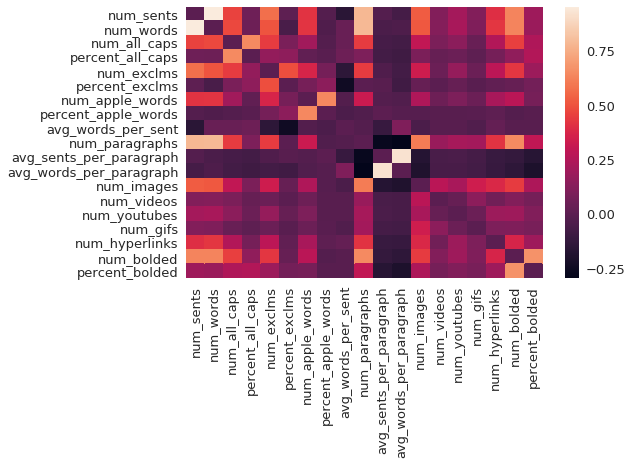

In [96]:
# Set the diagonal values to zero for both tables
for i in range(len(funded_corr)):
    funded_corr.iloc[i, i] = 0
    failed_corr.iloc[i, i] = 0

# Plot a heatmap of the meta features in funded projects
plt.figure(figsize = (8, 5))
sns.heatmap(funded_corr);

Some of the features are correlated with other features. 

- `num_sents`, `num_paragraphs`, and `num_words` have positive correlations with many other features as these features represent the length of the campaign section
- `num_images` is moderately correlated with `num_paragraphs`, suggesting that creators place images inside paragraph tags
- the % analogs of the absolute feature counts are correlated, not surprisingly
- `avg_sents_per_paragraph` is correlated *very* strongly with `avg_words_per_paragraph`, suggesting that creators are consistent with word and sentence density

Let's turn our attention to unfunded projects.

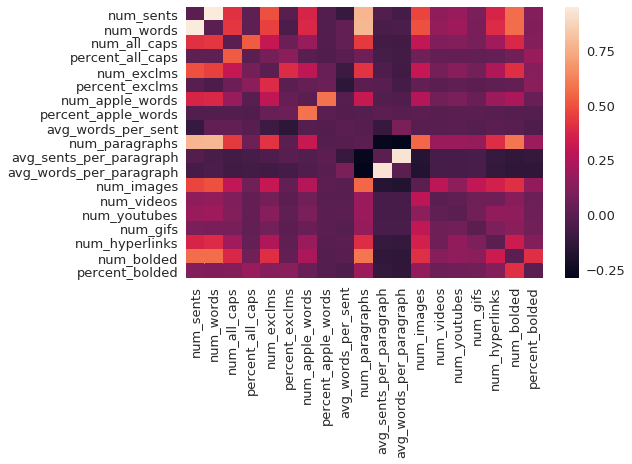

In [104]:
# Plot a heatmap of the meta features in unfunded projects
plt.figure(figsize = (8, 5))
sns.heatmap(failed_corr);

Let's take a deeper look at the correlation between `avg_sents_per_paragraph` and `avg_words_per_paragraph`.

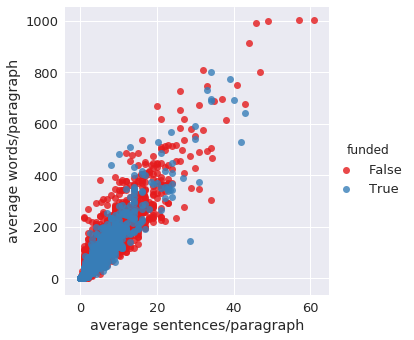

In [167]:
sns.lmplot(
    data=section1_df_full,
    x='avg_sents_per_paragraph',
    y='avg_words_per_paragraph',
    hue='funded',
    fit_reg=False,
    palette='Set1'
).set(xlabel='average sentences/paragraph', ylabel='average words/paragraph');

Finally, let's compare the correlation coefficients between funded and unfunded projects to see which pairs differ the most between classes.

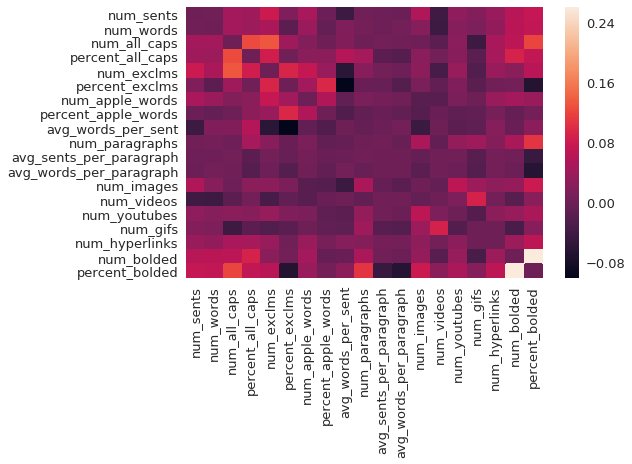

In [107]:
# Plot a heatmap of the meta features in unfunded projects
plt.figure(figsize = (8, 5))
sns.heatmap(funded_corr - failed_corr);

The correlation between the absolute feature counts and their % analogs differ the most between classes.

## 2. Determining which features are correlated with class

For each feature, let's draw a kernel density estimation plot for funded and unfunded projects.

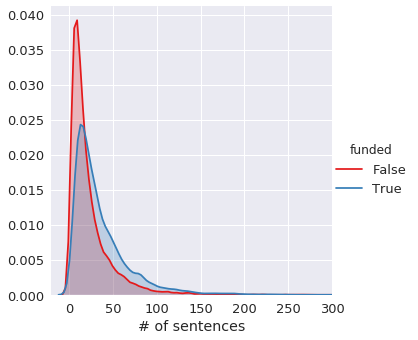

In [177]:
# Setup FacetGrid object and facet on funded status
fig = sns.FacetGrid(section1_df_full, hue='funded', size=5, palette='Set1')

# Plot a kde plot on the feature
fig.map(sns.kdeplot, 'num_sents', shade=True) \
    .add_legend() \
    .set(xlim=(-20, 300), xlabel='# of sentences');

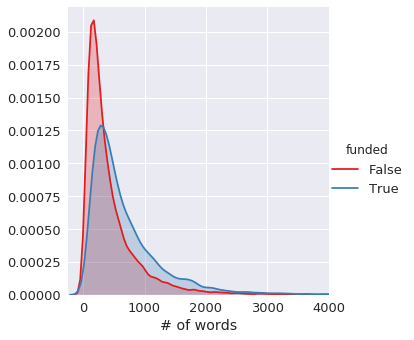

In [178]:
# Setup FacetGrid object and facet on funded status
fig = sns.FacetGrid(section1_df_full, hue='funded', size=5, palette='Set1')

# Plot a kde plot on the feature
fig.map(sns.kdeplot, 'num_words', shade=True) \
    .add_legend() \
    .set(xlim=(-250, 4000), xlabel='# of words');

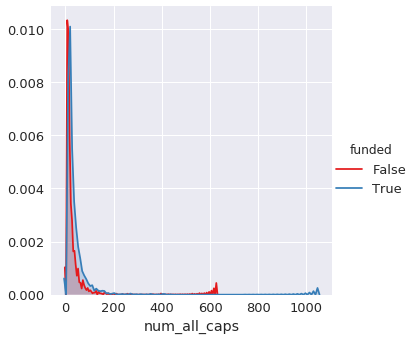

In [179]:
# Setup FacetGrid object and facet on funded status
fig = sns.FacetGrid(section1_df_full, hue='funded', size=5, palette='Set1')

# Plot a kde plot on the feature
fig.map(sns.kdeplot, 'num_all_caps', shade=True).add_legend();

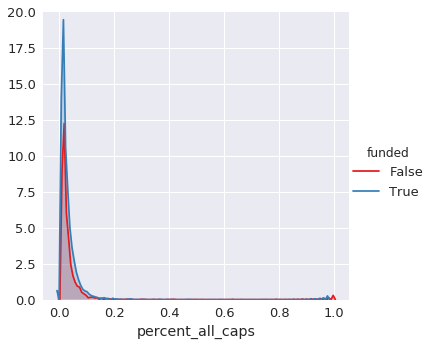

In [180]:
# Setup FacetGrid object and facet on funded status
fig = sns.FacetGrid(section1_df_full, hue='funded', size=5, palette='Set1')

# Plot a kde plot on the feature
fig.map(sns.kdeplot, 'percent_all_caps', shade=True) \
    .add_legend() \
    .set(ylim=(0, 20));

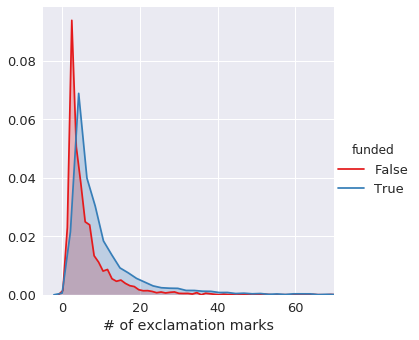

In [182]:
# Setup FacetGrid object and facet on funded status
fig = sns.FacetGrid(section1_df_full, hue='funded', size=5, palette='Set1')

# Plot a kde plot on the feature
fig.map(sns.kdeplot, 'num_exclms', shade=True) \
    .add_legend() \
    .set(xlim=(-5, 70), xlabel='# of exclamation marks');

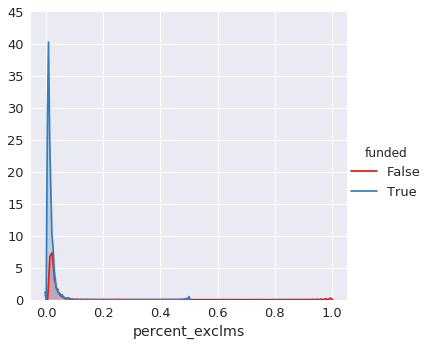

In [183]:
# Setup FacetGrid object and facet on funded status
fig = sns.FacetGrid(section1_df_full, hue='funded', size=5, palette='Set1')

# Plot a kde plot on the feature
fig.map(sns.kdeplot, 'percent_exclms', shade=True) \
    .add_legend() \
    .set(ylim=(0, 45));

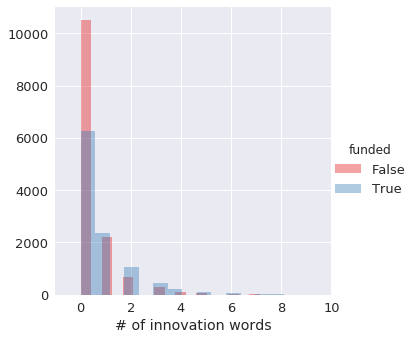

In [165]:
# Setup FacetGrid object and facet on funded status
fig = sns.FacetGrid(section1_df_full, hue='funded', size=5, palette='Set1')

# Plot a kde plot on the feature
fig.map(sns.distplot, 'num_apple_words', kde=False) \
    .add_legend() \
    .set(xlim=(-1, 10), xlabel='# of innovation words');

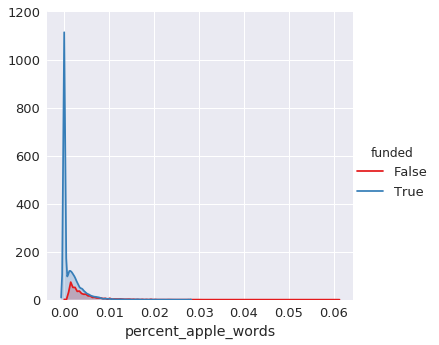

In [191]:
# Setup FacetGrid object and facet on funded status
fig = sns.FacetGrid(section1_df_full, hue='funded', size=5, palette='Set1')

# Plot a kde plot on the feature
fig.map(sns.kdeplot, 'percent_apple_words', shade=True) \
    .add_legend() \
    .set(ylim=(0, 1200));

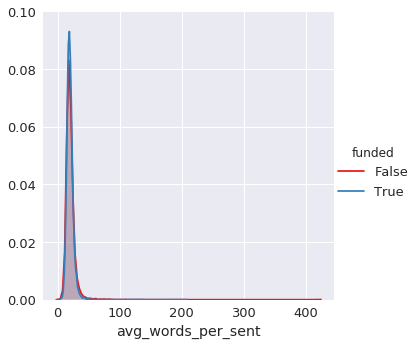

In [197]:
# Setup FacetGrid object and facet on funded status
fig = sns.FacetGrid(section1_df_full, hue='funded', size=5, palette='Set1')

# Plot a kde plot on the feature
fig.map(sns.kdeplot, 'avg_words_per_sent', shade=True) \
    .add_legend() \
    .set(ylim=(0, 0.1));

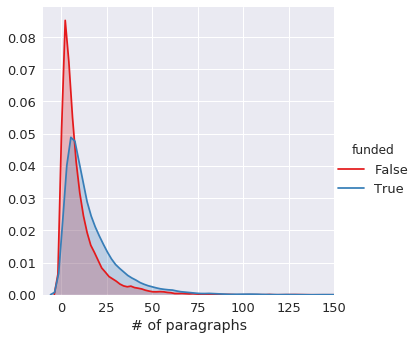

In [242]:
# Setup FacetGrid object and facet on funded status
fig = sns.FacetGrid(section1_df_full, hue='funded', size=5, palette='Set1')

# Plot a kde plot on the feature
fig.map(sns.kdeplot, 'num_paragraphs', shade=True) \
    .add_legend() \
    .set(xlim=(-10, 150), xlabel='# of paragraphs');

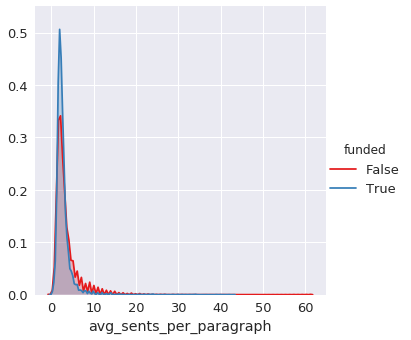

In [204]:
# Setup FacetGrid object and facet on funded status
fig = sns.FacetGrid(section1_df_full, hue='funded', size=5, palette='Set1')

# Plot a kde plot on the feature
fig.map(sns.kdeplot, 'avg_sents_per_paragraph', shade=True) \
    .add_legend() \
    .set(ylim=(0, 0.55));

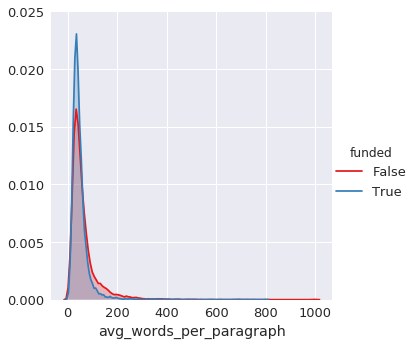

In [211]:
# Setup FacetGrid object and facet on funded status
fig = sns.FacetGrid(section1_df_full, hue='funded', size=5, palette='Set1')

# Plot a kde plot on the feature
fig.map(sns.kdeplot, 'avg_words_per_paragraph', shade=True) \
    .add_legend() \
    .set(ylim=(0, 0.025));

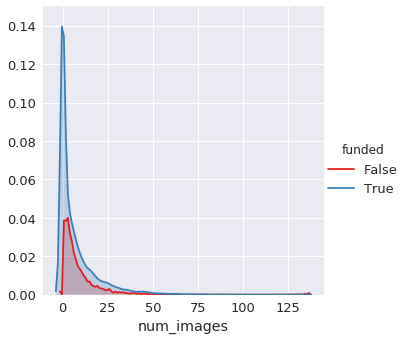

In [220]:
# Setup FacetGrid object and facet on funded status
fig = sns.FacetGrid(section1_df_full, hue='funded', size=5, palette='Set1')

# Plot a kde plot on the feature
fig.map(sns.kdeplot, 'num_images', shade=True) \
    .add_legend() \
    .set(ylim=(0, 0.15));

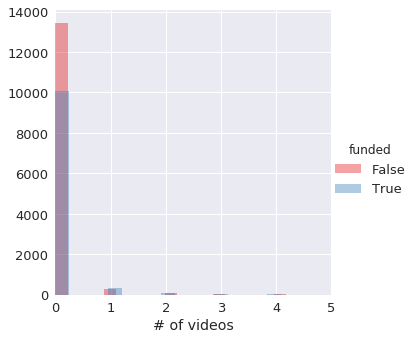

In [243]:
# Setup FacetGrid object and facet on funded status
fig = sns.FacetGrid(section1_df_full, hue='funded', size=5, palette='Set1')

# Plot a kde plot on the feature
fig.map(sns.distplot, 'num_videos', kde=False) \
    .add_legend() \
    .set(xlim=(0, 5), xlabel='# of videos');

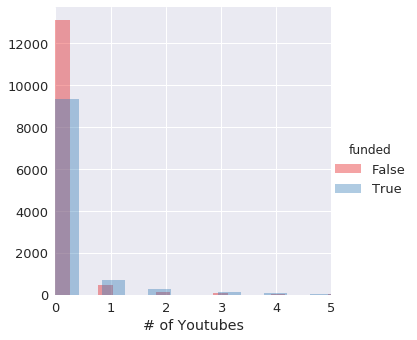

In [225]:
# Setup FacetGrid object and facet on funded status
fig = sns.FacetGrid(section1_df_full, hue='funded', size=5, palette='Set1')

# Plot a kde plot on the feature
fig.map(sns.distplot, 'num_youtubes', kde=False) \
    .add_legend() \
    .set(xlim=(0, 5), xlabel='# of Youtubes');

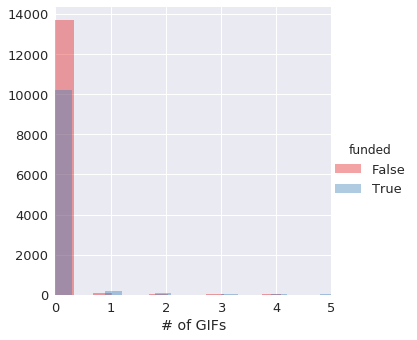

In [227]:
# Setup FacetGrid object and facet on funded status
fig = sns.FacetGrid(section1_df_full, hue='funded', size=5, palette='Set1')

# Plot a kde plot on the feature
fig.map(sns.distplot, 'num_gifs', kde=False) \
    .add_legend() \
    .set(xlim=(0, 5), xlabel='# of GIFs');

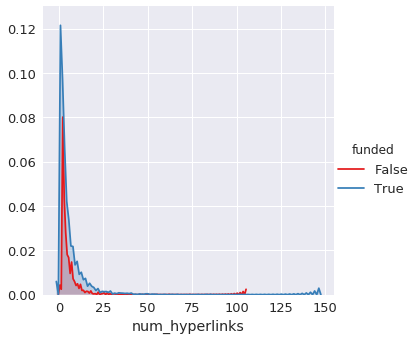

In [229]:
# Setup FacetGrid object and facet on funded status
fig = sns.FacetGrid(section1_df_full, hue='funded', size=5, palette='Set1')

# Plot a kde plot on the feature
fig.map(sns.kdeplot, 'num_hyperlinks', shade=True) \
    .add_legend() \
    .set(ylim=(0, 0.13));

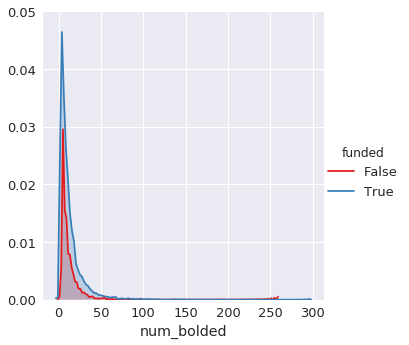

In [231]:
# Setup FacetGrid object and facet on funded status
fig = sns.FacetGrid(section1_df_full, hue='funded', size=5, palette='Set1')

# Plot a kde plot on the feature
fig.map(sns.kdeplot, 'num_bolded', shade=True) \
    .add_legend() \
    .set(ylim=(0, 0.05));

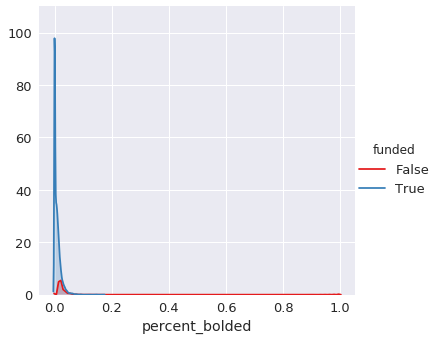

In [241]:
# Setup FacetGrid object and facet on funded status
fig = sns.FacetGrid(section1_df_full, hue='funded', size=5, palette='Set1')

# Plot a kde plot on the feature
fig.map(sns.kdeplot, 'percent_bolded', shade=True) \
    .add_legend() \
    .set(ylim=(0, 110));

Out of these graphs, I'd say that `num_words`, `num_sentences`, `num_paragraphs` and `num_apple_words` differ most between classes.